# Email spam classifier

## Aim - Predict/Classify new email entered by user as Spam or Not spam using Naive bayes classifier
#### Following steps will be followed for achieving the aim:
#### 1)Loading of dataset, data cleaning and pre-processing 
#### 2) text to vector conversion using countvectorizer and tf-idf both to compare results.
#### 3) model building using Naive bayes algorithm

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("completeSpamAssassin.csv")
df.sample(10)

,Unnamed: 0,Body,Label
1545,1545,TR Rehber 6 REKLAMLARINIZA SERVET Ã–DEMEYiN!!!...,1
2386,2386,Definitional nit to pick:Robert Harley writes:...,0
3657,3657,use Perl Daily NewsletterIn this issue:\n *...,0
4247,4247,URL: http://boingboing.net/#85534676\nDate: No...,0
1054,1054,"\nThe United States has a program, called Dive...",1
5503,5503,"The demographic transition, where birthrates a...",0
3845,3845,"URL: http://www.newsisfree.com/click/-4,643694...",0
358,358,OFFICE OF:EGNR. FEMI DANIEL\nFEDERAL MINISTRY ...,1
4790,4790,John P. Looney wrote:\n> I decided to try out...,0
5359,5359,. . . or eventuality: Bush and Cheney fuck eac...,0


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [5]:
df["Label"].value_counts()

0    4150
1    1896
Name: Label, dtype: int64

In [6]:
df.duplicated().sum()

752

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    6045 non-null   object
 1   Label   6046 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 94.6+ KB


In [8]:
df.drop_duplicates(keep="first",inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5294 entries, 0 to 6043
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    5293 non-null   object
 1   Label   5294 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.1+ KB


In [10]:
df["Label"].value_counts()

0    3915
1    1379
Name: Label, dtype: int64

In [11]:
df.isnull().sum()

Body     1
Label    0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Body     0
Label    0
dtype: int64

# EDA

In [14]:
import matplotlib.pyplot as plt

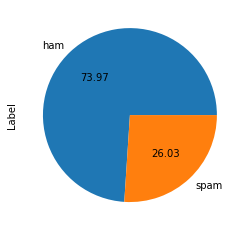

In [15]:
df["Label"].value_counts().plot(kind="pie",labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [16]:
# data is imbalaced we cannot depend on accuracy,we will consider precision

In [17]:
import nltk

In [18]:
df["num_chars"]=df["Body"].apply(len)

In [19]:
df.head()

,Body,Label,num_chars
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610
3,##############################################...,1,2863
4,I thought you might like these:\n1) Slim Down ...,1,641


In [20]:
df["num_words"]=df["Body"].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df["num_sents"]=df["Body"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,Body,Label,num_chars,num_words,num_sents
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4
3,##############################################...,1,2863,690,35
4,I thought you might like these:\n1) Slim Down ...,1,641,108,4


In [23]:
df[["num_chars","num_words","num_sents"]].describe()

,num_chars,num_words,num_sents
count,5293.000000,5293.000000,5293.000000
mean,1947.724164,363.437181,12.778009
std,5228.745045,804.169344,27.965797
min,1.000000,0.000000,0.000000
25%,561.000000,105.000000,4.000000
50%,1005.000000,192.000000,7.000000
75%,1751.000000,346.000000,12.000000
max,194978.000000,18564.000000,808.000000


In [24]:
df[df["Label"]==0][["num_chars","num_words","num_sents"]].describe()

,num_chars,num_words,num_sents
count,3915.000000,3915.000000,3915.000000
mean,1792.657471,340.491443,11.449042
std,5025.721947,776.134680,26.049364
min,5.000000,1.000000,1.000000
25%,522.000000,97.000000,3.500000
50%,960.000000,189.000000,6.000000
75%,1650.000000,328.000000,11.000000
max,194978.000000,18564.000000,808.000000


In [25]:
df[df["Label"]==1][["num_chars","num_words","num_sents"]].describe()

,num_chars,num_words,num_sents
count,1378.000000,1378.000000,1378.000000
mean,2388.280116,428.627721,16.553701
std,5745.835985,875.977347,32.520800
min,1.000000,0.000000,0.000000
25%,675.250000,120.000000,5.000000
50%,1094.500000,201.000000,9.000000
75%,2168.000000,408.500000,15.000000
max,129635.000000,13288.000000,404.000000


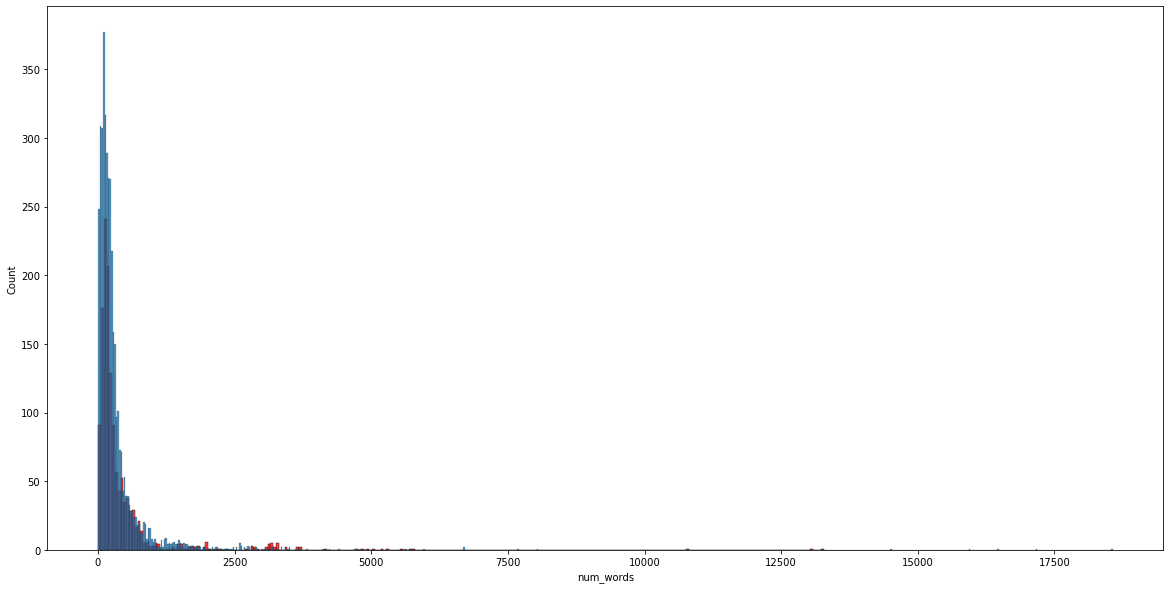

In [26]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.histplot(df[df["Label"]==1]["num_words"],color="red")
sns.histplot(df[df["Label"]==0]["num_words"])
plt.show()

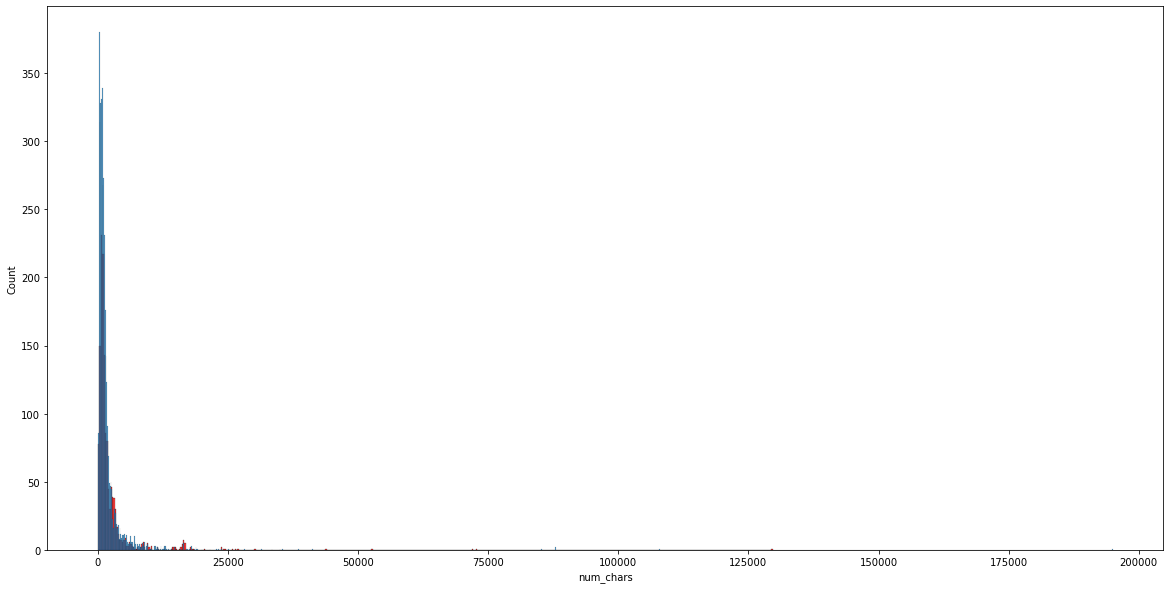

In [27]:
plt.figure(figsize=(20,10))
sns.histplot(df[df["Label"]==1]["num_chars"],color="red")
sns.histplot(df[df["Label"]==0]["num_chars"])
plt.show()

In [28]:
# no. of words used in spam mails are comparitively larger than ham mails.

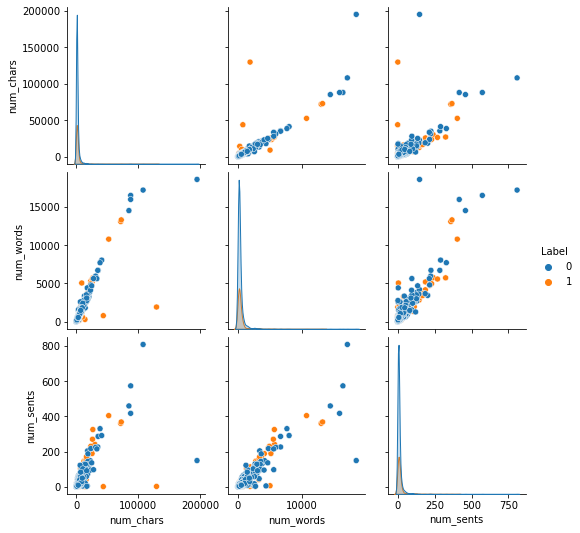

In [29]:
sns.pairplot(df,hue="Label")

<AxesSubplot:>

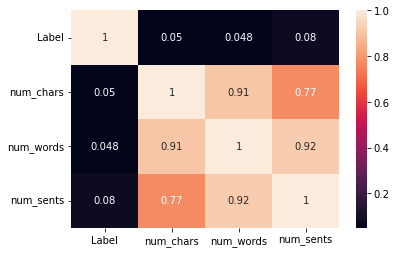

In [30]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing

In [31]:
import string
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("working")

'work'

In [33]:
def transform(x):
    x=x.lower()
    #for converting text to list for further transformation
    x=nltk.word_tokenize(x)
    
    # fordropping words other than alpganumeric
    l=[]
    for i in x:
        if i.isalnum():
            l.append(i)
    # for removing stopwords
    x=l[:]
    l.clear()
    for i in x:
        if i not in string.punctuation and i not in stopwords.words("english"):
            l.append(i)
    # for stemming
    x=l[:]
    l.clear()
    for i in x:
        l.append(ps.stem(i))
    return " ".join(l)
        

In [34]:
transform('plase tell me, what is your real name')

'plase tell real name'

In [35]:
df["new_body"]=df["Body"].apply(transform)

In [36]:
df.head()

,Body,Label,num_chars,num_words,num_sents,new_body
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,##############################################...,1,2863,690,35,adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,1,641,108,4,thought might like 1 slim guarante lose lb 30 ...


In [37]:
spam_corpus=[]
for i in df[df["Label"]==1]["new_body"].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

252422

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


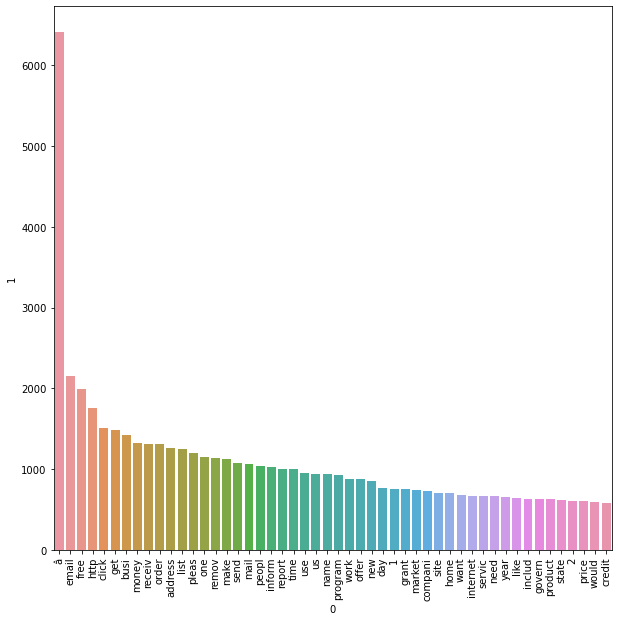

In [39]:
from collections import Counter
x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(10,10))
sns.barplot(x,y)
plt.xticks(rotation=90)
plt.show()

In [40]:
ham_corpus=[]
for i in df[df["Label"]==0]["new_body"].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [41]:
len(ham_corpus)

544803

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


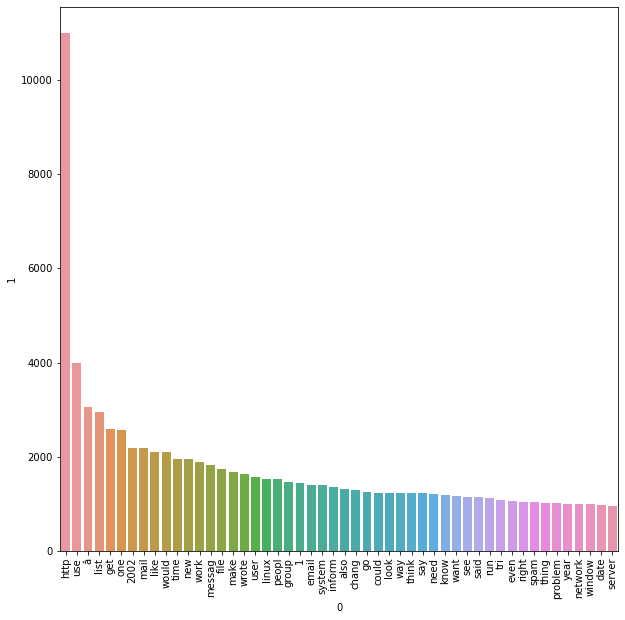

In [42]:
x1=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
y1=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(10,10))
sns.barplot(x1,y1)
plt.xticks(rotation=90)
plt.show()

# Model building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [44]:
x=cv.fit_transform(df["new_body"]).toarray()

In [45]:
x.shape

(5293, 36890)

In [46]:
y=df["Label"]

In [47]:
y.shape

(5293,)

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [50]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [51]:
gnb1=GaussianNB()
mnb1=MultinomialNB()
bnb1=BernoulliNB()

In [52]:
gnb1.fit(x_train,y_train)
y_pred=gnb1.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9357884796978282
0.8645833333333334
[[742  39]
 [ 29 249]]


In [53]:
mnb1.fit(x_train,y_train)
y_pred1=mnb1.predict(x_test)
print(accuracy_score(y_pred1,y_test))
print(precision_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

0.9745042492917847
0.9375
[[762  18]
 [  9 270]]


In [54]:
bnb1.fit(x_train,y_train)
y_pred2=bnb1.predict(x_test)
print(accuracy_score(y_pred2,y_test))
print(precision_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))

0.8932955618508026
0.6979166666666666
[[745  87]
 [ 26 201]]


# using tfidf

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [56]:
x1=tfidf.fit_transform(df["new_body"]).toarray()

In [57]:
y1=df["Label"]

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=2)

In [59]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [60]:
gnb.fit(x_train,y_train)
y_pred11=gnb.predict(x_test)
print(accuracy_score(y_pred11,y_test))
print(precision_score(y_pred11,y_test))
print(confusion_matrix(y_pred11,y_test))

0.9348441926345609
0.8506944444444444
[[745  43]
 [ 26 245]]


In [61]:
mnb.fit(x_train,y_train)
y_pred22=mnb.predict(x_test)
print(accuracy_score(y_pred22,y_test))
print(precision_score(y_pred22,y_test))
print(confusion_matrix(y_pred22,y_test))

0.9046270066100094
0.6493055555555556
[[771 101]
 [  0 187]]


In [62]:
bnb.fit(x_train,y_train)
y_pred33=bnb.predict(x_test)
print(accuracy_score(y_pred33,y_test))
print(precision_score(y_pred33,y_test))
print(confusion_matrix(y_pred33,y_test))

0.8932955618508026
0.6979166666666666
[[745  87]
 [ 26 201]]


# pickling

In [64]:
import pickle
pickle.dump(cv,open("vectorizer.pkl","wb"))
pickle.dump(mnb1,open("model.pkl","wb"))
pickle.dump(transform,open("func.pkl","wb"))

In [69]:
df.iloc[2386,0]

'Matthias Saou wrote:\n> OK, I\'ll add this.Cool :)> Requiring a file that isn\'t part of an rpm is not possible, no, except\n> maybe by stopping the build process if it isn\'t found... but that\'s errr...\n> ugly!\n> And I really think that for people who installed a kernel from sources, the\n> easiest is to install the alsa kernel drivers from source too...Yes, it is...  But then alsa-driver requires alsa-kernel, and I don\'t quite \nlike --nodeps...> This would be a tricky one since to use the "--with " feature of\n> rpmbuild, I think you\'d need to add individual handling of each and every\n> card :-/That\'s ok.  I was only considering it for the sake of tweaking anyway, not \nfor some real-world need :).> That\'s what the "alsa-driver" is there for, create all the base files\n> excluding the kernel drivers. What I would suggest for dependency reasons\n> it to install an "alsa-kernel" for the original kernel (you\'ve kept it,\n> right? ;-)) and install ALSA modules from source for 